## Implementation of queue using list

In [9]:
class Queue:
    def __init__(self):
        self.items =[]
    def enqueue(self,item):
        self.items.append(item)
    def dequeue(self):
        if not self.is_empty():
            return self.items.pop(0)
        else:
            return None
    def peek(self):
        if not self.is_empty():
            return self.items[0]
        else:
            return None
    def is_empty(self):
        return len(self.items)==0
    def size(self):
        return len(self.items)
        

In [12]:
q = Queue()
q.enqueue(1)
q.enqueue(2)
q.enqueue(3)


print(q.dequeue())
print(q.peek())
print(q.dequeue())
print(q.is_empty())
print(q.size())
print(q.dequeue())
print(q.is_empty())

1
2
2
False
1
3
True


### Circular Queue

In [30]:
class CircularQueue:
    def __init__(self,size):
        self.size=size
        self.queue = [None]*size
        self.rear = self.front = 0
        self.count=0
    def enqueue(self,item):
        if self.count == self.size:
            print("Queue is Full")
        else:
            self.queue[self.rear] = item
            self.rear = (self.rear + 1)%self.size
            self.count+=1
    def dequeue(self):
        if self.count == 0:
            print("Queue is empty")
        else:
            item =self.queue[self.front]
            self.queue[self.front] = None
            self.front = (self.front+1)%self.size
            self.count-=1
            return item
    def peek(self):
        if self.count ==0:
            return None
        else:
            return self.queue[self.front]
    def is_empty(self):
        return self.count == 0

    def current_size(self):
        return self.count
        

In [33]:
cq = CircularQueue(5)
cq.enqueue(10)
cq.enqueue(20)
cq.enqueue(30)
cq.enqueue(40)
cq.enqueue(50)
print(cq.dequeue())
print(cq.dequeue())
cq.enqueue(60)
print(cq.current_size())

10
20
4


In [32]:
cq = CircularQueue(5)
cq.enqueue(1)
cq.enqueue(2)
cq.enqueue(3)
print(cq.dequeue())  # Output: 1
cq.enqueue(4)
cq.enqueue(5)
cq.enqueue(6)  # Queue is full
print(cq.peek())  # Output: 2
print(cq.current_size())  # Output: 4


1
2
5


### Priority Queue

In [34]:
import heapq

class PriorityQueue:
    def __init__(self):
        self.heap = []

    def enqueue(self, item, priority):
        heapq.heappush(self.heap, (priority, item))

    def dequeue(self):
        if self.is_empty():
            return None
        return heapq.heappop(self.heap)[1]

    def peek(self):
        if self.is_empty():
            return None
        return self.heap[0][1]

    def is_empty(self):
        return len(self.heap) == 0


In [37]:
pq = PriorityQueue()
pq.enqueue('task1', 1)
pq.enqueue('task2', 3)
pq.enqueue('task3', 2)
print(pq.dequeue()) 
print(pq.dequeue())
print(pq.dequeue())
#print(pq.peek())     


task1
task3
task2


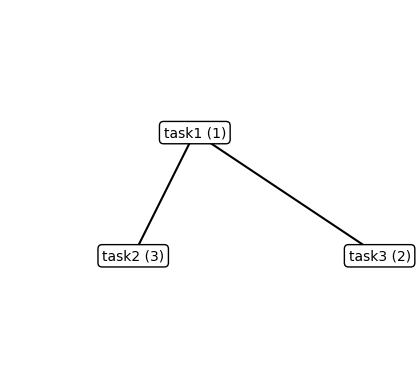

In [39]:
import matplotlib.pyplot as plt
import numpy as np

def plot_heap(heap):
    fig, ax = plt.subplots()
    n = len(heap)
    levels = int(np.ceil(np.log2(n + 1)))  # Height of the tree

    # Calculate positions for nodes
    x = []
    y = []
    for level in range(levels):
        nodes_on_level = 2 ** level
        start_x = (2 ** (levels - level - 1) - 1) / 2
        interval = 2 ** (levels - level)
        for i in range(nodes_on_level):
            x.append(start_x + i * interval)
            y.append(-level)

    
    for i, value in enumerate(heap):
        ax.text(x[i], y[i], f'{value[1]} ({value[0]})', ha='center', va='center', bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='white'))

  
    for i in range(n):
        left_child = 2 * i + 1
        right_child = 2 * i + 2
        if left_child < n:
            ax.plot([x[i], x[left_child]], [y[i], y[left_child]], 'k-')
        if right_child < n:
            ax.plot([x[i], x[right_child]], [y[i], y[right_child]], 'k-')

    ax.set_xlim(-1, 2 ** (levels - 1))
    ax.set_ylim(-levels, 1)
    ax.set_aspect('equal')
    ax.axis('off')
    plt.show()


pq = PriorityQueue()
pq.enqueue('task1', 1)
pq.enqueue('task2', 3)
pq.enqueue('task3', 2)

plot_heap(pq.heap)


In [1]:
import threading
import queue
import time

# Create a shared queue
buffer = queue.Queue(maxsize=5)  # Buffer with a maximum size of 5

# Producer thread
def producer():
    for i in range(10):
        item = f"item-{i}"
        buffer.put(item)  # Add item to the buffer
        print(f"Produced {item}")
        time.sleep(1)  # Simulate production time

# Consumer thread
def consumer():
    while True:
        item = buffer.get()  # Retrieve item from the buffer
        if item is None:  # Sentinel value to exit the loop
            break
        print(f"Consumed {item}")
        buffer.task_done()  # Signal that the task is done
        time.sleep(2)  # Simulate processing time

# Create and start threads
producer_thread = threading.Thread(target=producer)
consumer_thread = threading.Thread(target=consumer)

producer_thread.start()
consumer_thread.start()

# Wait for the producer to finish
producer_thread.join()

# Send sentinel value to stop the consumer thread
buffer.put(None)

# Wait for the consumer to finish
consumer_thread.join()


Produced item-0
Consumed item-0
Produced item-1
Produced item-2Consumed item-1

Produced item-3
Consumed item-2Produced item-4

Produced item-5
Consumed item-3
Produced item-6
Produced item-7
Consumed item-4
Produced item-8
Produced item-9
Consumed item-5
Consumed item-6
Consumed item-7
Consumed item-8
Consumed item-9
